In [1]:
## imports

import sys
import os
import numpy as np
import xarray as xr
import pandas as pd
import cmocean as cmo
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


## relative (%)

In [3]:
abrupt2x = np.array([-19, -29.1, -1.3, -9.8, -7.7, -5.6, 16.8])
abrupt4x = np.array([-42.6, -36.3, 1.2, -48.9, -54.4, -33.8, -22.8, -27.8, 26.9])
abrupt6x = np.array([-44.7])
abrupt8x = np.array([-58.6, -61.1, -46.8, 0.3])

pliomip2 = np.array([-43.7, -28.8, -66.5, -28.7, -1.6, -41.4, 2.5, -38.3, -20.33, 
                     -16.43, -21.04, -7.43, -25.6, 3, -38, -20.86])

pmip_mh  = np.array([-5.6, -4.5, -3.7, -8.7, -8.7, 18.1, -17.7, -13.0, -2.1,
                    -24.7, -18.1, -2.9, -4.1, -6.0, -2.9, -10.7, -1.4, 1.4,
                    -17.3, -4.9, -36.7, -14.2, -12.2, -17.3, 10.7, -21.6, 
                    -9.5, -10.3, 16.1, -21.1])
pmip_lgm = np.array([-17, 2.8, 0.4, -47, -30.8, 16.6, 32.4, -13.4, 17.0, 4.3, -3.9, 18.2])
pmip_lig = np.array([-22.6, -20.3, -23.3, -19.9, -27.2, 0.2, -30.3, 10.2, -17.2, -53.8, -23.0, -20.6])


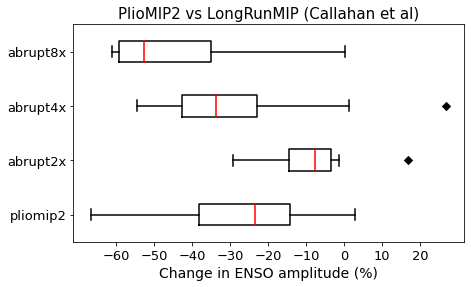

In [4]:
fig = plt.figure(figsize = (7,4))
ax = fig.add_subplot(111)

bp = ax.boxplot([pliomip2, abrupt2x, abrupt4x, abrupt8x], notch=False, vert=0, widths = 0.4,
               boxprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), whiskerprops=dict(linewidth=1.5),
               flierprops=dict(markerfacecolor='k', marker='D'),
               medianprops=dict(linewidth=1.5, color='r'));


ax.set_yticklabels(['pliomip2', 'abrupt2x', 'abrupt4x', 'abrupt8x'], fontsize = 13)

xticks = np.arange(-60,25,10)
ax.set_xticks(xticks)
plt.xticks(fontsize=13)
ax.set_xlabel('Change in ENSO amplitude (%)', fontsize = 14)

plt.title('PlioMIP2 vs LongRunMIP (Callahan et al)', fontsize = 15)

plt.show()

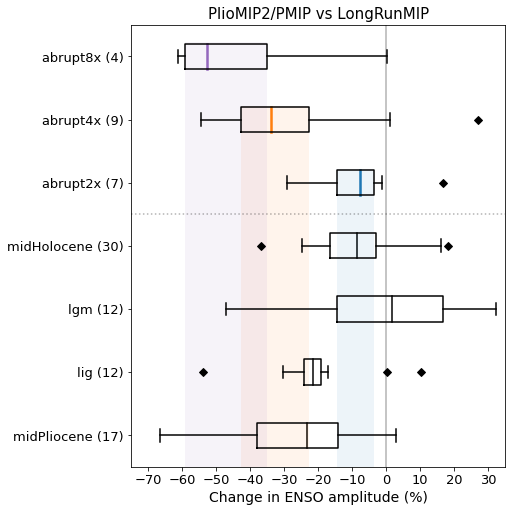

In [24]:
fig = plt.figure(figsize = (7,7), constrained_layout=True)
ax = fig.add_subplot(111)

med_colors = ['k','k','k','k','tab:blue', 'tab:orange', 'tab:purple']
med_lws    = np.array([1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5])

ax.add_patch(Rectangle((np.percentile(abrupt2x,25), 0.5), np.percentile(abrupt2x,75)-np.percentile(abrupt2x,25), 5.22-0.5, 
                       facecolor = 'tab:blue', alpha = 0.08))
ax.add_patch(Rectangle((np.percentile(abrupt4x,25), 0.5), np.percentile(abrupt4x,75)-np.percentile(abrupt4x,25), 6.22-0.5, 
                       facecolor = 'tab:orange', alpha = 0.08))
ax.add_patch(Rectangle((np.percentile(abrupt8x,25), 0.5), np.percentile(abrupt8x,75)-np.percentile(abrupt8x,25), 7.22-0.5, 
                       facecolor = 'tab:purple', alpha = 0.08))
    
# ax.plot([np.median(abrupt2x),np.median(abrupt2x)],[5, 0.5], color='tab:blue', zorder =-2, alpha = 0.3, linewidth = 2.5)
# ax.plot([np.median(abrupt4x),np.median(abrupt4x)],[6, 0.5], color='tab:orange', zorder =-2, alpha = 0.3, linewidth = 2.5)
# ax.plot([np.median(abrupt8x),np.median(abrupt8x)],[7, 0.5], color='tab:purple', zorder =-2, alpha = 0.3, linewidth = 2.5)

bp = ax.boxplot([pliomip2, pmip_lig, pmip_lgm, pmip_mh, abrupt2x, abrupt4x, abrupt8x], notch=False, vert=0, widths = 0.4,
               boxprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), whiskerprops=dict(linewidth=1.5),
               flierprops=dict(markerfacecolor='k', marker='D'));

for i_median in range(len(bp['medians'])):
    bp['medians'][i_median].set(color = med_colors[i_median], linewidth = med_lws[i_median], zorder=-1)

ax.set_yticklabels(['midPliocene (17)', 'lig (12)', 'lgm (12)', 'midHolocene (30)', 'abrupt2x (7)', 'abrupt4x (9)', 'abrupt8x (4)'], fontsize = 13)

ax.plot([-75,35], [4.5,4.5], 'k:', alpha=0.3)
ax.set_xlim([-75,35])
ax.plot([0,0], [0.5,7.5], 'k-', alpha = 0.3)

xticks = np.arange(-70,35,10)
ax.set_xticks(xticks)
plt.xticks(fontsize=13)
ax.set_xlabel('Change in ENSO amplitude (%)', fontsize = 14)

plt.title('PlioMIP2/PMIP vs LongRunMIP', fontsize = 15)

# plt.show()

plt.savefig('figures/analog/ENSO_change_paleo_longrun_v2.jpg', dpi = 200)

In [20]:
np.percentile(abrupt2x,40)

-8.959999999999999

## Method 1: does target (future) median and IQR overlap with source (past) median and IQR? (source as reference)


In [23]:
overlap_frac_method1(abrupt2x, pmip_mh)

(0.06, 0.82, 1)

In [9]:

def overlap_frac_method1(future, past):

    # target i.e. 'future'
    data1 = future

    # source i.e. geological period
    data2 = past

    median_1 = np.median(data1)
    p25_1    = np.percentile(data1, 25)
    p75_1    = np.percentile(data1, 75)

    median_2 = np.median(data2)
    p25_2    = np.percentile(data2, 25)
    p75_2    = np.percentile(data2, 75)

    # find fraction of match: target median in source IQR
    # is the target median outside of the source IQR? if not: match = 0
    if median_1 < median_2 and median_1 < p25_2:
        match = 0;
    elif median_1 > median_2 and median_1 > p75_2:
        match = 0;
    # is the target median inside the source IQR? if yes: match depends on how close medians are
    elif median_1 <= median_2 and median_1 >= p25_2:
        match = (median_1 - p25_2) / (median_2 - p25_2);
    elif median_1 >= median_2 and median_1 <= p75_2:
        match = (median_1 - p75_2) / (median_2 - p75_2);
    match = np.round(match,2)

    # find upper limit: overlap of target IQR and source IQR
    # if match is 1 (unlikely), upper limit is 1
    if match == 1:
        upper = 1;
    # if source median is inside target IQR; upper limit is 1
    elif median_2 >= p25_1 and median_2 <= p75_1:
        upper = 1;
    # if source median is outside target IQR but IQRs still overlap: compute overlap
    elif median_2 > p25_1 and median_2 > p75_1 and p25_2 < p75_1:
        upper = (p75_1 - p25_2) / (median_2 - p25_2);
    elif median_2 < p25_1 and median_2 < p75_1 and p75_2 > p25_1:
        upper = (p25_1 - p75_2) / (median_2 - p75_2);
    # if no overlap
    else:
        upper = 0;
    upper = np.round(upper,2)

    # find lower limit: check whether target IQR is entirely in source IQR:
    # if match is 0 (possible), lower limit is 0 as well.
    if match == 0:
        lower = 0;
    # if target IQR falls outside of source IQR on either side; lower range is 0
    elif p25_1 < p25_2 or p75_1 > p75_2:
        lower = 0;
    # if target IQR falls inside of source IQR: compute lowest overlap
    else:
        try1 = (p25_1 - p25_2) / (median_2 - p25_2);
        try2 = (p75_1 - p75_2) / (median_2 - p75_2);
        lower = min([try1, try2])
    lower = np.round(lower,2)

    return lower, match, upper

In [7]:

# target i.e. 'future'
data1 = abrupt4x

# source i.e. geological period
data2 = pmip_lig

median_1 = np.median(data1)
p25_1    = np.percentile(data1, 25)
p75_1    = np.percentile(data1, 75)

median_2 = np.median(data2)
p25_2    = np.percentile(data2, 25)
p75_2    = np.percentile(data2, 75)

# find fraction of match: target median in source IQR
# is the target median outside of the source IQR? if not: match = 0
if median_1 < median_2 and median_1 < p25_2:
    match = 0;
elif median_1 > median_2 and median_1 > p75_2:
    match = 0;
# is the target median inside the source IQR? if yes: match depends on how close medians are
elif median_1 <= median_2 and median_1 >= p25_2:
    match = (median_1 - p25_2) / (median_2 - p25_2);
elif median_1 >= median_2 and median_1 <= p75_2:
    match = (median_1 - p75_2) / (median_2 - p75_2);
match = np.round(match,2)
    
# find upper limit: overlap of target IQR and source IQR
# if match is 1 (unlikely), upper limit is 1
if match == 1:
    upper = 1;
# if source median is inside target IQR; upper limit is 1
elif median_2 >= p25_1 and median_2 <= p75_1:
    upper = 1;
# if source median is outside target IQR but IQRs still overlap: compute overlap
elif median_2 > p25_1 and median_2 > p75_1 and p25_2 < p75_1:
    upper = (p75_1 - p25_2) / (median_2 - p25_2);
elif median_2 < p25_1 and median_2 < p75_1 and p75_2 > p25_1:
    upper = (p25_1 - p75_2) / (median_2 - p75_2);
# if no overlap
else:
    upper = 0;
upper = np.round(upper,2)
    
# find lower limit: check whether target IQR is entirely in source IQR:
# if match is 0 (possible), lower limit is 0 as well.
if match == 0:
    lower = 0;
# if target IQR falls outside of source IQR on either side; lower range is 0
elif p25_1 < p25_2 or p75_1 > p75_2:
    lower = 0;
# if target IQR falls inside of source IQR: compute lowest overlap
else:
    try1 = (p25_1 - p25_2) / (median_2 - p25_2);
    try2 = (p75_1 - p75_2) / (median_2 - p75_2);
    lower = min([try1, try2])
lower = np.round(lower,2)
    
print(lower, match, upper)

0 0 0.55


## absolute (deg C)

In [23]:
abrupt4x_abs = np.array([-0.34, -0.34, -0.03, -0.27, -0.34, -0.14, 0.15])

pliomip2_abs = np.array([-0.46, -0.20, -0.70, -0.28, -0.10, -0.02, -0.25, 
                     0.03, -0.26, -0.18, -0.11, -0.18, -0.08, -0.12, 0.03, -0.28, -0.12])

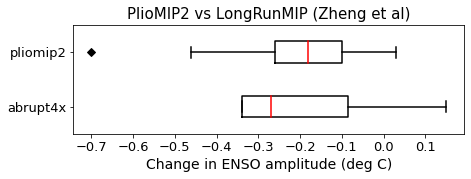

In [54]:
fig = plt.figure(figsize = (7,2))
ax = fig.add_subplot(111)

bp = ax.boxplot([abrupt4x_abs, pliomip2_abs], notch=False, vert=0, widths = 0.4,
               boxprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), whiskerprops=dict(linewidth=1.5),
               flierprops=dict(markerfacecolor='k', marker='D'),
               medianprops=dict(linewidth=1.5, color='r'));

# x-axis labels
ax.set_yticklabels(['abrupt4x', 'pliomip2'], fontsize = 13)
xticks = np.arange(-0.7,0.11,0.1)
ax.set_xticks(xticks)
ax.set_xlabel('Change in ENSO amplitude (deg C)', fontsize = 14)


plt.xticks(fontsize=13)

ax.set_title('PlioMIP2 vs LongRunMIP (Zheng et al)', fontsize = 15)

plt.show()

## Combined

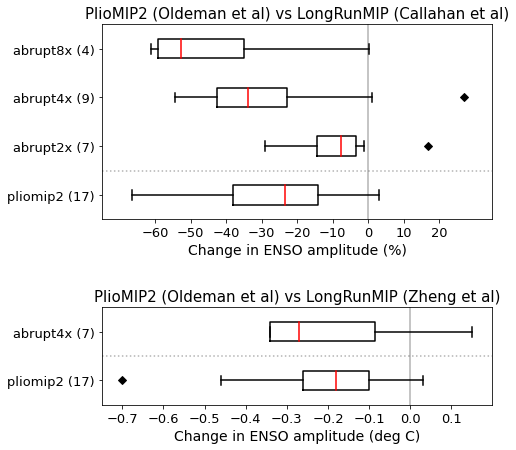

In [80]:
fig = plt.figure(figsize = (7,7))

widths = [1]; heights = [4,2];
spec = fig.add_gridspec(ncols=1, nrows=2, width_ratios=widths, height_ratios=heights, wspace=0.1, hspace=0.6)

ax = fig.add_subplot(spec[0])

bp = ax.boxplot([pliomip2, abrupt2x, abrupt4x, abrupt8x], notch=False, vert=0, widths = 0.4,
               boxprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), whiskerprops=dict(linewidth=1.5),
               flierprops=dict(markerfacecolor='k', marker='D'),
               medianprops=dict(linewidth=1.5, color='r'));

ax.plot([-75,35], [1.5,1.5], 'k:', alpha=0.3)
ax.set_xlim([-75,35])
ax.plot([0,0], [0.5,4.5], 'k-', alpha = 0.3)

ax.set_yticklabels(['pliomip2 (17)', 'abrupt2x (7)', 'abrupt4x (9)', 'abrupt8x (4)'], fontsize = 13)
xticks = np.arange(-60,25,10)
ax.set_xticks(xticks)
plt.xticks(fontsize=13)
ax.set_xlabel('Change in ENSO amplitude (%)', fontsize = 14)
ax.set_title('PlioMIP2 (Oldeman et al) vs LongRunMIP (Callahan et al)', fontsize = 15)

ax = fig.add_subplot(spec[1])

bp = ax.boxplot([pliomip2_abs, abrupt4x_abs], notch=False, vert=0, widths = 0.4,
               boxprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), whiskerprops=dict(linewidth=1.5),
               flierprops=dict(markerfacecolor='k', marker='D'),
               medianprops=dict(linewidth=1.5, color='r'));

ax.plot([-0.75,0.2], [1.5,1.5], 'k:', alpha=0.3)
ax.set_xlim([-0.75,0.2])
ax.plot([0,0], [0.5,2.5], 'k-', alpha = 0.3)

ax.set_yticklabels(['pliomip2 (17)', 'abrupt4x (7)'], fontsize = 13)
xticks = np.arange(-0.7,0.11,0.1)
ax.set_xticks(xticks)
ax.set_xlabel('Change in ENSO amplitude (deg C)', fontsize = 14)
ax.set_title('PlioMIP2 (Oldeman et al) vs LongRunMIP (Zheng et al)', fontsize = 15)


plt.xticks(fontsize=13)
plt.show()

first comparison of ENSO amplitude change in PlioMIP2 and LongRunMIP

In [97]:
plio_models = ['CESM2', 'IPSLCM6A', 'COSMOS', 'EC-Earth3', 'CESM1.2', 'IPSLCM5A', 'MIROC4m', 'IPSLCM5A2', 'HadCM3',
              'GISS2.1G', 'CCSM4', 'CCSM4-Utr', 'CCSM4-UoT', 'NorESM-L', 'MRI2.3', 'NorESM1-F', 'HadGEM3']
plio_dsats = np.array([5.2, 3.5, 3.3, 4.9, 4.0, 2.3, 3.1, 2.2, 2.9, 2.1, 2.6, 4.8, 3.8, 2.1, 2.4, 1.7, 5.1])

dsat_plio = xr.DataArray(data=plio_dsats, dims=["model"], coords=dict(model=(["model"], plio_models)))

# Read CMIP data

In [2]:
def read_cmip_csv(path):

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(path)

    # Extract model names from the first row
    model_names = df.columns[1:].tolist()

    # Set the first column as the index (time dimension)
    df.set_index(df.columns[0], inplace=True)

    # Extract the time values
    time_values = df.index.tolist()

    # Convert the remaining data to a 2D array (temperature values)
    data_values = df.values

    # Create an xarray DataArray
    da = xr.DataArray(data_values, coords={'time': time_values, 'model': model_names}, dims=['time', 'model'])

    return da

In [23]:
path245 = "CMIP/CMIP6_SSP245_SAT_change_timeseries.csv"
path370 = "CMIP/CMIP6_SSP370_SAT_change_timeseries.csv"
path585 = "CMIP/CMIP6_SSP585_SAT_change_timeseries.csv"

dsat245 = read_cmip_csv(path245)
dsat370 = read_cmip_csv(path370)
dsat585 = read_cmip_csv(path585)

# 245 has one model with wrong data format
dsat245 = dsat245.where(dsat245.model!="CCCR-IITM_IITM-ESM_r1i1p1f1", drop=True)
# 585 as well
dsat585 = dsat585.where(dsat585.model!="CCCR-IITM_IITM-ESM_r1i1p1f1", drop=True)

In [24]:
dsat245_near = dsat245.sel(time = slice(2021,2040)).mean("time")
dsat245_med  = dsat245.sel(time = slice(2041,2060)).mean("time")
dsat245_long = dsat245.sel(time = slice(2081,2100)).mean("time")

dsat370_near = dsat370.sel(time = slice(2021,2040)).mean("time")
dsat370_med  = dsat370.sel(time = slice(2041,2060)).mean("time")
dsat370_long = dsat370.sel(time = slice(2081,2100)).mean("time")

dsat585_near = dsat585.sel(time = slice(2021,2040)).mean("time")
dsat585_med  = dsat585.sel(time = slice(2041,2060)).mean("time")
dsat585_long = dsat585.sel(time = slice(2081,2100)).mean("time")

In [144]:
def plot_data_quantiles(data, ax, y_val = 1, mcolor = 'b'):

    p1 = ax.plot(data, y_val*np.ones(len(data)), '.', markersize = 3, color = mcolor)
    quantiles = data.quantile([0.25, 0.5, 0.75]);
    p2 = ax.plot(quantiles, y_val*np.ones(len(quantiles))+0.1, '-', color = mcolor);
    p3 = ax.plot(quantiles[1], y_val+0.1, 's',  markeredgewidth=2, 
                 markersize = 8, markerfacecolor = 'w', color = mcolor);
    p2 = ax.plot(quantiles, y_val*np.ones(len(quantiles))+0.1, '-', color = mcolor);
    p3 = ax.plot(quantiles[1], y_val+0.1, 's',  markeredgewidth=2, 
                 markersize = 8, markerfacecolor = 'w', color = mcolor);

    return p1, p2, p3

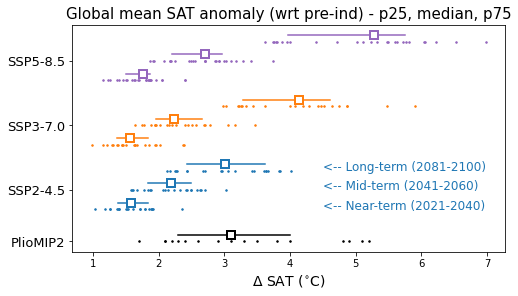

In [147]:
fig = plt.figure(figsize = (7,4), constrained_layout=True)
ax = fig.add_subplot(111)

mcolor = 'tab:blue';
p1 = plot_data_quantiles(dsat245_near, ax, y_val = 1, mcolor = mcolor);
plot_data_quantiles(dsat245_med , ax, y_val = 1.3, mcolor = mcolor);
plot_data_quantiles(dsat245_long, ax, y_val = 1.6, mcolor = mcolor);

mcolor = 'tab:orange';
plot_data_quantiles(dsat370_near, ax, y_val = 2, mcolor = mcolor);
plot_data_quantiles(dsat370_med , ax, y_val = 2.3, mcolor = mcolor);
plot_data_quantiles(dsat370_long, ax, y_val = 2.6, mcolor = mcolor);

mcolor = 'tab:purple';
plot_data_quantiles(dsat585_near, ax, y_val = 3, mcolor = mcolor);
plot_data_quantiles(dsat585_med , ax, y_val = 3.3, mcolor = mcolor);
plot_data_quantiles(dsat585_long, ax, y_val = 3.6, mcolor = mcolor);

mcolor = 'k';
plot_data_quantiles(dsat_plio, ax, y_val = 0.5, mcolor = mcolor);

yticks = np.array([0.5, 1.3, 2.3, 3.3])
ax.set_yticks(yticks);
ax.set_yticklabels(['PlioMIP2', 'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5'], fontsize = 13, rotation=0);
ax.set_xlabel(r'$\Delta$ SAT ($^{\circ}$C)', fontsize = 14);

ax.text(4.5, 1, '<-- Near-term (2021-2040)', fontsize = 12, color='tab:blue')
ax.text(4.5, 1.3, '<-- Mid-term (2041-2060)', fontsize = 12, color='tab:blue')
ax.text(4.5, 1.6, '<-- Long-term (2081-2100)', fontsize = 12, color='tab:blue')

ax.set_title('Global mean SAT anomaly (wrt pre-ind) - p25, median, p75', fontsize = 15)

plt.savefig('figures/analog/dsat_SSP_pliomip.jpg', dpi=200)